# Unit 8: Calculating trends in cooling degree days 


Cooling degree days (CDD) are used to study regional climates in connection with energy consumption for air conditioning (and other heat-related energy production/consumption processes). 

<img src="map_us_cdd.png" width=600 height=400>

We want to validate the U.S. Energy Information Administration (EIA) map with a couple of selected US GHCN climate station data.


## 1. Where can we expect to experience the most cooling degree days?

* Albany 
* NY City
* Fresno
* Seattle


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt # handles dates for us
import pandas as pd
# For the linear regression we use Scipy's function linregress()
from scipy.stats import linregress


# slightly better plots we can get when we
# load the package that changes the default plotting of matplotlib
import seaborn as sns
sns.set_theme()

###############################################################
# local modules: 
# Make sure you have acis.py in the same folder 
# together with this notebook!!!
###############################################################
import acis as ac # download and load functions for daily data

In this script we use the module acis again. This allows us to access the GHCN-daily station data from the server in Cornell.

We need the following functions from this module:

* *ac.download_stationdata_dly_years*
* *ac.load_station_data_dly*


In [3]:
#################################################
# Control variables 
#################################################
# first and last year to download
yr1, yr2 = 1950 , 2018

d1=dt.datetime(yr1,1,1)
d2=dt.datetime(yr2,12,31)
# datetime objects can calculate the number of days for us
# We need ndays to create the correct 2-dimensional data array for tmax below
diff=d2-d1
ndays=diff.days+1


###########################################################
# The new way with a dictionary named stationlist
###########################################################
stations={'USW00014735':'Albany AP',
          'USW00094728':'New York CNTRL PK TWR',
          'USW00024233':'Seattle_Tacoma_Intl_AP',
          'USW00093193':'Fresno_Yosemite_Intl_AP'}




### We apply now the dictionary and download  the four station data from the server



In [4]:
for key in stations:# key is the station id e.g. USW00014735
    print ("Get data for station "+stations[key])
    filename=key+"_"+str(yr1)+"-"+str(yr2)+"_dly.csv"
    print ("download data to local file "+filename)
    result=ac.download_stationdata_dly_years(key,startyear=yr1,endyear=yr2)


Get data for station Albany AP
download data to local file USW00014735_1950-2018_dly.csv
################################################################################
# send data request to http://data.rcc-acis.org/StnData
################################################################################
saved data to local file USW00014735_1950-2018_dly.csv
data columns are:
0 : date
1 : min_temp
2 : mean_temp
3 : max_temp
4 : pcpn
5 : snow
Get data for station New York CNTRL PK TWR
download data to local file USW00094728_1950-2018_dly.csv
################################################################################
# send data request to http://data.rcc-acis.org/StnData
################################################################################
saved data to local file USW00094728_1950-2018_dly.csv
data columns are:
0 : date
1 : min_temp
2 : mean_temp
3 : max_temp
4 : pcpn
5 : snow
Get data for station Seattle_Tacoma_Intl_AP
download data to local file USW00024233_1950-2018_

### Reading the local CSV spreadsheet files 

 

In [5]:
# first four lines have text info, use keyword argument skiprows
label='USW00014735'
station='Albany NY'
df=ac.load_station_data_dly("USW00014735_1950-2018_dly.csv") 

df
#NOTE pcpn and snow can contain missing values or flags for trace of precpipitation 
# you can check with 
#df.query("pcpn =='T' or pcpn == 'M'") 

number of data rows: 25202
returns the 2-d arrays with columns
0 year
1 month
2 day
3 min_temp
4 mean_temp
5 max_temp
6 pcpn
7 snow


,year,month,day,min_temp,mean_temp,max_temp,pcpn,snow
time,,,,,,,,
1950-01-01,1950,1,1,22.0,29.5,37.0,0.000000e+00,0.0
1950-01-02,1950,1,2,32.0,35.5,39.0,6.000000e-02,0.0
1950-01-03,1950,1,3,38.0,46.5,55.0,1.000000e-02,0.0
1950-01-04,1950,1,4,55.0,59.5,64.0,1.000000e-09,0.0
1950-01-05,1950,1,5,35.0,49.5,64.0,9.000000e-02,0.0
...,...,...,...,...,...,...,...,...
2018-12-27,2018,12,27,24.0,29.5,35.0,0.000000e+00,0.0
2018-12-28,2018,12,28,35.0,42.5,50.0,9.000000e-02,0.0
2018-12-29,2018,12,29,26.0,38.0,50.0,0.000000e+00,0.0


### Calculate total cooling degree days for each year for a range of years

Now let's calculate the total CDDs per year for a range of years for each station. 
- First define the range of years of interest. 
- Use np.zeroes to create a 2-d array that can store the CDDs for each year for each station. 
- Then loop through each year
    - apply the previous code block to calculate CDDs 
    - assign the result to the data array (apply row, column index to fill in one value)for each year for each station. 
- Lastly, plot the results. 


Note: For stations with incomplete data, there is a RunTimeWarning while running this code. It appears that when calculating the CDDs by subtracting 65.0 from the mean temperature data, python likely encountered a nan value(s) within the mean temperature array (for the years 2009 and 2015). However, everything still appears to have worked as Python likely kept those nan values as nan and moved on. This is fine because when summing the CDDs for each year, we ignore the nan values.

## Calculation of Cooling Degree Days for one selected station and for one year

The data we work with are in the variable x (2-dim array).
The date information is in arrays years, months, days
(It is the same time range in all station data files)


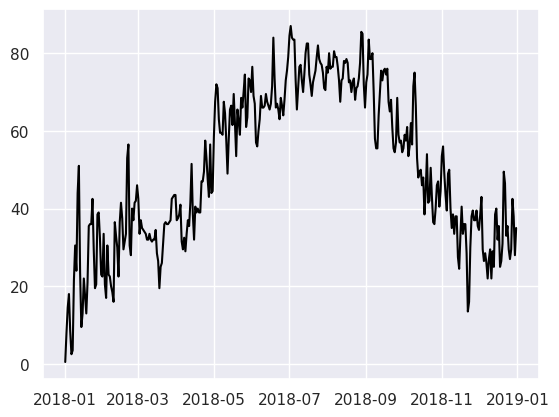

In [6]:
dfq=df.query("year == 2018")
dfq.columns
istation=0 # one station from the four
mean_temp=dfq['mean_temp']
plt.plot(mean_temp,color='black')
plt.show()


### Calculation of Cooling Degree Days using numpy methods

- check where in the 'array' mean_temp the values are > 65F
- then sum up the temperature values increments above 65 F for all days


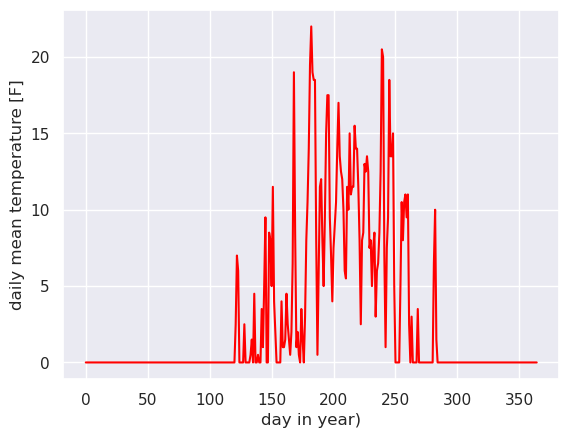

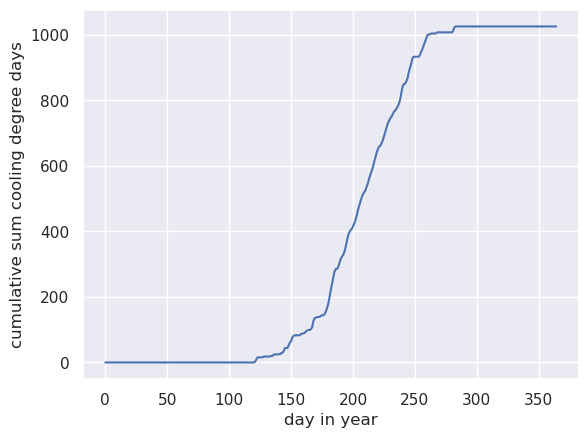

CDD for the selected station:  USW00014735
The CCD for the selected year is 1026.0 F 


In [7]:

tbase=65
tempadd=np.where(mean_temp>tbase,mean_temp-tbase,0) 
plt.plot(tempadd,color='red')
plt.xlabel("day in year)")
plt.ylabel("daily mean temperature [F]")
plt.show()

plt.plot(np.cumsum(tempadd))
plt.xlabel("day in year")
plt.ylabel("cumulative sum cooling degree days")
plt.show()
print ("CDD for the selected station: ",label)
print (f"The CCD for the selected year is {np.sum(tempadd)} F ")



### Pandas method for calculation of the CDD



In [ ]:
tbase=65
# dfq is already selected to be one year of data, only
dfq65=dfq.query(f"mean_temp > {tbase}")
tempadd=dfq65['mean_temp'].values-tbase
cdd=np.sum(tempadd)
print (f"The CCD for the selected year is {cdd} F ")

# or you could do this
# cdd=(dfq65['mean_temp'].values-tbase).sum()


## Here we begin the analysis of the temporal variability in CDDs

### First, let's calculate CDD values for each year 1950-2018

In [8]:
yr1 = 1950
yr2 = 2018
tbase=65 # base temperature for CDD calculations
years = np.arange(yr1,yr2+1,1)

cdd_list = [] 
for i,yr in enumerate(years):
    dfq=df.query(f"year == {yr}")
    # dfq is already selected to be one year of data, only
    dfq65=dfq.query(f"mean_temp > {tbase}")
    tempadd=dfq65['mean_temp'].values-tbase
    cdd=np.sum(tempadd)
    cdd_list.append(cdd)
cdds=np.array(cdd_list)

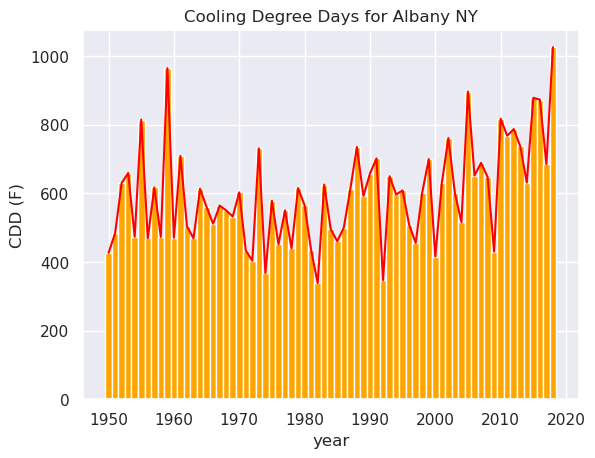

In [9]:
# first plot of the time series (without trend line)
plt.bar(years,cdds,color='orange',width=1)
plt.plot(years,cdds,color='red')
plt.xlabel("year")
plt.ylabel("CDD (F)")
plt.title("Cooling Degree Days for "+station)

plt.show()

## Here comes the statistical part 
## Linear regression

### Trend analysis 1950-2018 

In [10]:
# linear regression line
yr1 = 1950
yr2 = 2018
tbase=65 # base temperature for CDD calculations
years = np.arange(yr1,yr2+1,1)
cdd_list = [] 
for i,yr in enumerate(years):
    dfq=df.query(f"year == {yr}")
    # dfq is already selected to be one year of data, only
    dfq65=dfq.query(f"mean_temp > {tbase}")
    tempadd=dfq65['mean_temp'].values-tbase
    result=np.sum(tempadd)
    cdd_list.append(result)
cdds=np.array(cdd_list)

x=years
y=cdds

b, a, r, p_value,dump =linregress(x,y)
print(f"The linear regression line for {yr1}-{yr2}:")
print(f"yfit={a:.2f}+{b:.2f}*x")
print(f"with correlation r={r:.2f}")
print(f"and p-value to H0: 'b not equal 0' is p={p_value:.5f}")

# fitted values (they lie on the trend line)
cdds1=cdds # save for plotting
years1=years # save for plotting 
cdd_trend1=a+b*years1

The linear regression line for 1950-2018:
yfit=-5155.11+2.90*x
with correlation r=0.39
and p-value to H0: 'b not equal 0' is p=0.00081


## Trend analysis 1980-2018


In [11]:
# linear regression line
# one has several options how to use copy and paste
# of code from above
# just make sure that you have new variable names 
# to store the results so that we can compare the 
# trend line with the previous trend line
yr1 = 1980
yr2 = 2018
tbase=65 # base temperature for CDD calculations
years = np.arange(yr1,yr2+1,1)
cdd_list = [] 
for i,yr in enumerate(years):
    dfq=df.query(f"year == {yr}")
    # dfq is already selected to be one year of data, only
    dfq65=dfq.query(f"mean_temp > {tbase}")
    tempadd=dfq65['mean_temp'].values-tbase
    result=np.sum(tempadd)
    cdd_list.append(result)

cdds=np.array(cdd_list)

x=years
y=cdds

b, a, r, p_value,dump =linregress(x,y)
print(f"The linear regression line for {yr1}-{yr2}:")
print(f"yfit={a:.2f}+{b:.2f}*x")
print(f"with correlation r={r:.2f}")
print(f"and p-value to H0: 'b not equal 0' is p={p_value:.5f}")
years2=years # save for plotting
cdds2=cdds # sav for plotting
cdd_trend2=a+b*years2

The linear regression line for 1980-2018:
yfit=-16001.56+8.32*x
with correlation r=0.61
and p-value to H0: 'b not equal 0' is p=0.00003


## Show the fitted regression line in the plot


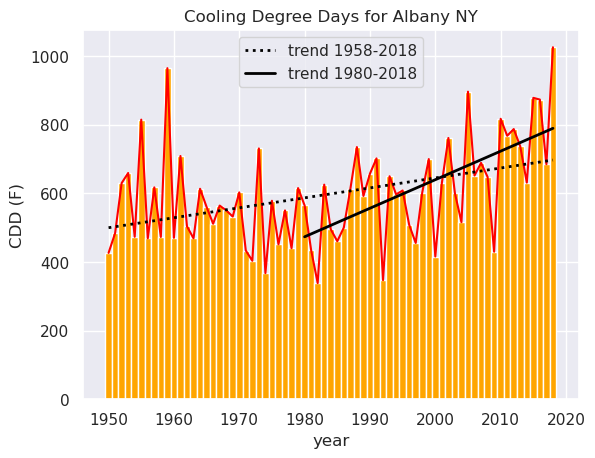

In [12]:


plt.bar(years1,cdds1,color='orange',width=1)
plt.plot(years1,cdds1,color='red')
plt.plot(years1,cdd_trend1,':',color='black',linewidth=2,label='trend 1958-2018')
plt.plot(years2,cdd_trend2,'-',color='black',linewidth=2,label='trend 1980-2018')
plt.xlabel("year")
plt.ylabel("CDD (F)")
plt.title("Cooling Degree Days for "+station)
plt.legend()

plt.show()


### References

Cooling degree days:
    
    
* Definition of cooling degree days (CDD) with base 65F:
    * [see the National Weather Service](https://www.weather.gov/key/climate_heat_cool)
* What are cooling degree days and how can we use them as indices for climate change?
    * [see EPA](https://www.epa.gov/climate-indicators/climate-change-indicators-heating-and-cooling-degree-days)
* Global Historical Climate Network - Daliy FTP site: [GHCNd](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) 
